In [27]:
import networkx as nx           # For making graphs,manipulation etc
import matplotlib.pyplot as plt # For plotting the graphs
import numpy as np              # Matrix manipulation
import seaborn as sns           # plotting
import pandas as pd
import collections
import random
import math
from statistics import mean 
from sklearn import preprocessing

#only for files from matrixmarket
from scipy.io import mmread

#Constants for country grouping
# asean_list = ['Singapore','Thailand','Myanmar','Lao PDR','Vietnam','Brunei','Philippines',
#               'Malaysia','Cambodia','Indonesia']

asean_list = ['Singapore','Thailand','Vietnam','Brunei','Philippines',
              'Malaysia','Cambodia','Indonesia']

saarc_list = ['India','Pakistan','Nepal','Bhutan','Myanmar','Sri Lanka','Maldives'] 
g20_list = ['Argentina', 'Australia', 'Brazil', 'Canada', 'China', 'Germany', 'France', 'India', 
            'Indonesia', 'Italy', 'Japan', 'Mexico', 'Saudi Arabia', 'South Africa',
            'Turkey','United States','United Kingdom']
Mercusor_list = ['Argentina','Brazil','Paraguay','Uruguay','Bolivia','Chile','Colombia','Ecuador',
                 'Guyana','Peru','Suriname']

#1996 to 1999
trade_1996 = pd.read_csv('Export_category_1996.csv')
trade_1997 = pd.read_csv('Export_category_1997.csv')
trade_1998 = pd.read_csv('Export_category_1998.csv')
trade_1999 = pd.read_csv('Export_category_1999.csv')

#2006 to 2009
trade_2006 = pd.read_csv('Export_category_2006.csv')
trade_2007 = pd.read_csv('Export_category_2007.csv')
trade_2008 = pd.read_csv('Export_category_2008.csv')
trade_2009 = pd.read_csv('Export_category_2009.csv')

product_description = {1: "Food and beverages",
                       2: "Industrial supplies not elsewhere specified",
                       3: "Fuels and lubricants",
                       4: "Capital goods (except transport equipment), and parts and accessories thereof",
                       5: "Transport equipment and parts and accessories thereof",
                       6: "Consumer goods not elsewhere specified",
                       7: "Goods not elsewhere specified"
                      }

In [28]:
trade_1996.rename(columns={"TradeValue in 1000 USD": "weight"}, inplace=True)
trade_1997.rename(columns={"TradeValue in 1000 USD": "weight"}, inplace=True)
trade_1998.rename(columns={"TradeValue in 1000 USD": "weight"}, inplace=True)
trade_1999.rename(columns={"TradeValue in 1000 USD": "weight"}, inplace=True)
trade_2006.rename(columns={"TradeValue in 1000 USD": "weight"}, inplace=True)
trade_2007.rename(columns={"TradeValue in 1000 USD": "weight"}, inplace=True)
trade_2008.rename(columns={"TradeValue in 1000 USD": "weight"}, inplace=True)
trade_2009.rename(columns={"TradeValue in 1000 USD": "weight"}, inplace=True)

In [29]:
# product mask
product_1 = trade_2008["ProductCode"] == 1
product_2 = trade_2008["ProductCode"] == 2
product_3 = trade_2008["ProductCode"] == 3 
product_4 = trade_2008["ProductCode"] == 4
product_5 = trade_2008["ProductCode"] == 5
product_6 = trade_2008["ProductCode"] == 6
product_7 = trade_2008["ProductCode"] == 7

# Create 2008 with different category code
trade_2008_1 = trade_2008[product_1]
trade_2008_2 = trade_2008[product_2]
trade_2008_3 = trade_2008[product_3]
trade_2008_4 = trade_2008[product_4]
trade_2008_5 = trade_2008[product_5]
trade_2008_6 = trade_2008[product_6]
trade_2008_7 = trade_2008[product_7]

## Create graph

In [65]:
G_2008_1 = nx.from_pandas_edgelist(trade_2008_1, 'ReporterName', 'PartnerName', ['weight'], 
                                 create_using=nx.DiGraph())
G_2008_2 = nx.from_pandas_edgelist(trade_2008_2, 'ReporterName', 'PartnerName', ['weight'], 
                                 create_using=nx.DiGraph())
G_2008_3 = nx.from_pandas_edgelist(trade_2008_3, 'ReporterName', 'PartnerName', ['weight'], 
                                 create_using=nx.DiGraph())
G_2008_4 = nx.from_pandas_edgelist(trade_2008_4, 'ReporterName', 'PartnerName', ['weight'], 
                                 create_using=nx.DiGraph())
G_2008_5 = nx.from_pandas_edgelist(trade_2008_5, 'ReporterName', 'PartnerName', ['weight'], 
                                 create_using=nx.DiGraph())
G_2008_6 = nx.from_pandas_edgelist(trade_2008_6, 'ReporterName', 'PartnerName', ['weight'], 
                                 create_using=nx.DiGraph())
G_2008_7 = nx.from_pandas_edgelist(trade_2008_7, 'ReporterName', 'PartnerName', ['weight'], 
                                 create_using=nx.DiGraph())
G_1997 = nx.from_pandas_edgelist(trade_1997, 'ReporterName', 'PartnerName', ['weight'], 
                                 create_using=nx.Graph())
G_2008 = nx.from_pandas_edgelist(trade_2008, 'ReporterName', 'PartnerName', ['weight'], 
                                 create_using=nx.Graph())

/Users/DavidRaj/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
/Users/DavidRaj/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:676: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cb.iterable(node_size):  # many node sizes


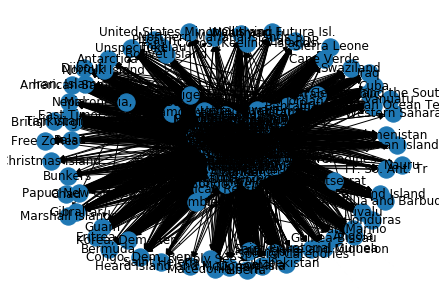

In [31]:
nx.draw(G_2008_1, with_labels  = True)

## Calculate Graph Metrics for 1997 and 2008

In [32]:
print(G_2008_1.degree(asean_list))
print(G_2008_2.degree(asean_list))
print(G_2008_3.degree(asean_list))
print(G_2008_4.degree(asean_list))
print(G_2008_5.degree(asean_list))
print(G_2008_6.degree(asean_list))
print(G_2008_7.degree(asean_list))

[('Singapore', 258), ('Thailand', 304), ('Vietnam', 250), ('Brunei', 72), ('Philippines', 224), ('Malaysia', 309), ('Cambodia', 68), ('Indonesia', 262)]
[('Singapore', 276), ('Thailand', 342), ('Vietnam', 274), ('Brunei', 110), ('Philippines', 256), ('Malaysia', 335), ('Cambodia', 113), ('Indonesia', 337)]
[('Singapore', 133), ('Thailand', 130), ('Vietnam', 61), ('Brunei', 27), ('Philippines', 60), ('Malaysia', 103), ('Cambodia', 18), ('Indonesia', 122)]
[('Singapore', 264), ('Thailand', 306), ('Vietnam', 207), ('Brunei', 109), ('Philippines', 242), ('Malaysia', 302), ('Cambodia', 96), ('Indonesia', 280)]
[('Singapore', 237), ('Thailand', 286), ('Vietnam', 194), ('Brunei', 71), ('Philippines', 178), ('Malaysia', 241), ('Cambodia', 101), ('Indonesia', 238)]
[('Singapore', 260), ('Thailand', 316), ('Vietnam', 241), ('Brunei', 108), ('Philippines', 261), ('Malaysia', 323), ('Cambodia', 192), ('Indonesia', 315)]
[('Singapore', 96), ('Thailand', 133), ('Vietnam', 94), ('Brunei', 28), ('Phil

## Random Node Deletion

In [33]:
def calculate_export(graph):
    pandas_adjency = nx.to_pandas_adjacency(graph)
    return pandas_adjency.sum(axis=1)

In [34]:
def node_deletion(gr, arr, name):
#     frame_holder = []
    fig = plt.figure(figsize=(10,10))

    for j in arr:
        list_of_countries = list(gr).copy()
        #remove target node from list
        list_of_countries.remove(j)

        temp = gr.copy()

        node_count = nx.number_of_nodes(gr)
        countries_removed = 0
        fraction = []
        trade_series = []
        DF = pd.DataFrame()
        

        #take out one country, and do node deletion on the rest
        for i in list_of_countries:
            #get series of import-export
            trade_series.append((calculate_export(temp))[j])
            fraction.append(countries_removed/node_count)
            temp_list = list(temp)

            temp_list.remove(i)
            temp.remove_node(i)
            countries_removed += 1

        DF["Fraction"] = fraction
        DF["Export"] = trade_series
        DF["Export"] = DF.iloc[:,1:] / DF.iloc[0,1:]
#         frame_holder.append(DF)
        plt.plot(DF['Fraction'], DF['Export'], label=j)
    plt.legend(loc="upper right")
    plt.title(name)
#     plt.xlim((0,0.1))
    plt.savefig(str(name)+".png")
    
    plt.show()

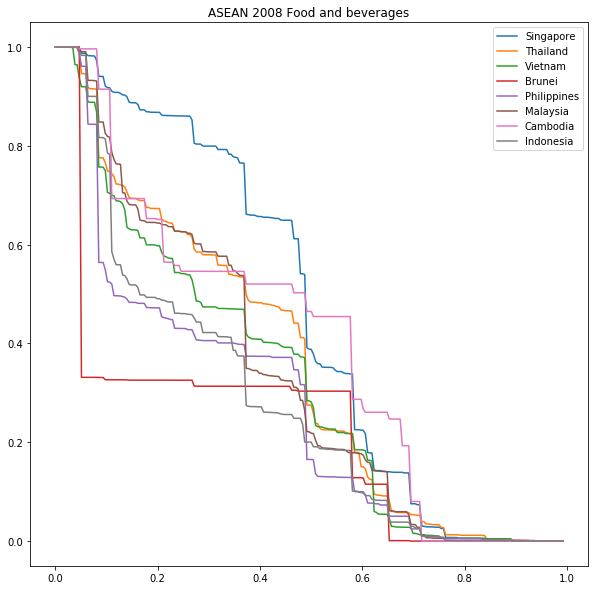

In [35]:
node_deletion(G_2008_1, asean_list, 'ASEAN 2008 Food and beverages')

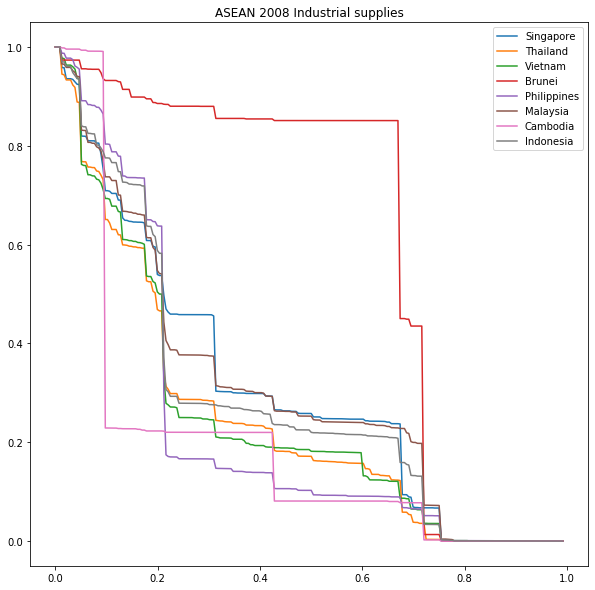

In [36]:
node_deletion(G_2008_2, asean_list,'ASEAN 2008 Industrial supplies')

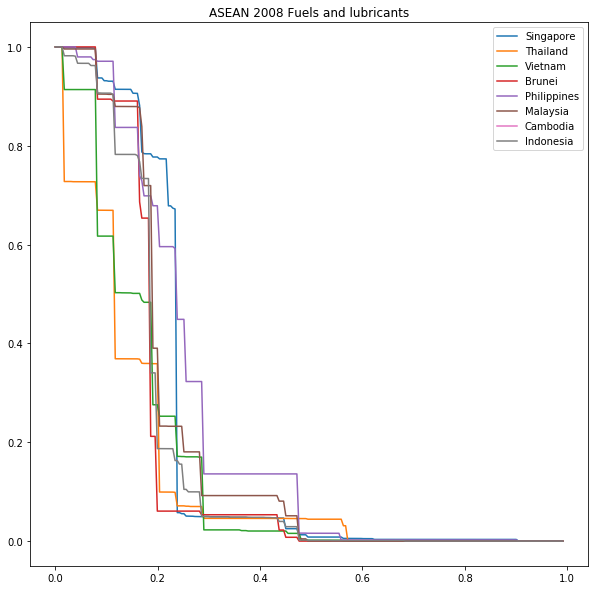

In [37]:
node_deletion(G_2008_3, asean_list, 'ASEAN 2008 Fuels and lubricants')

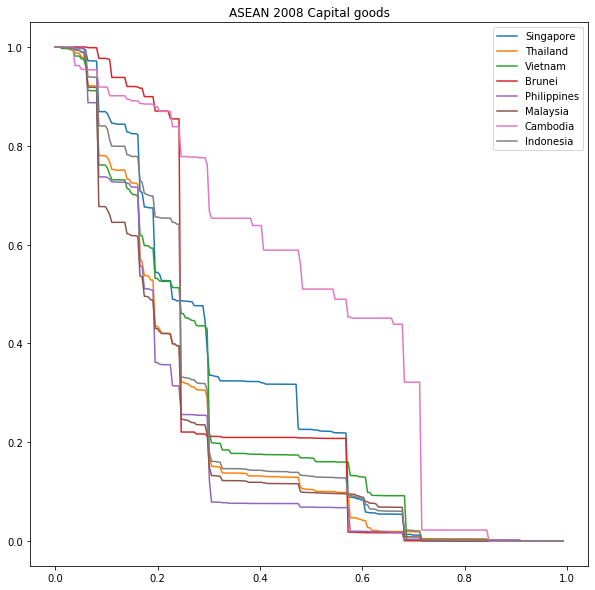

In [38]:
node_deletion(G_2008_4, asean_list,"ASEAN 2008 Capital goods")

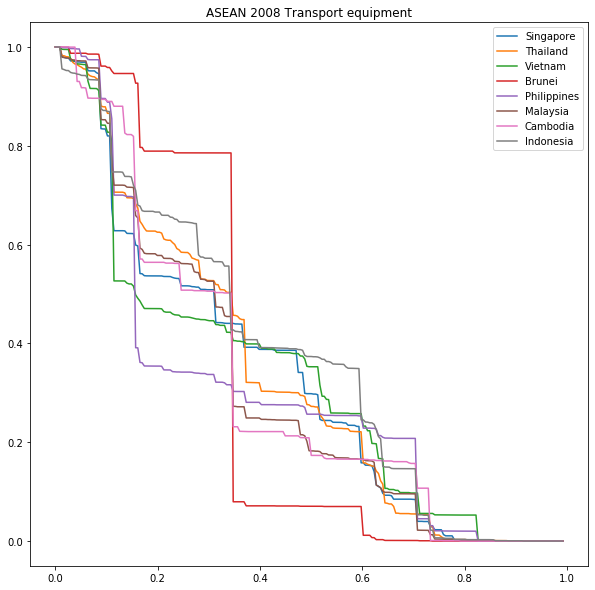

In [39]:
node_deletion(G_2008_5, asean_list, "ASEAN 2008 Transport equipment")

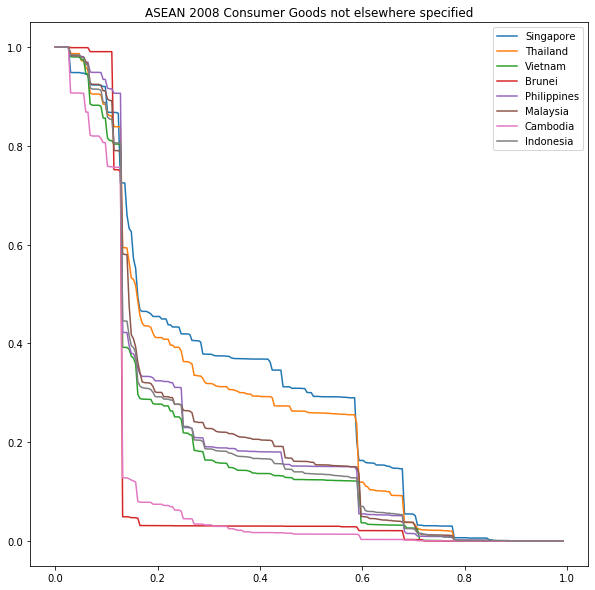

In [40]:
node_deletion(G_2008_6, asean_list,  "ASEAN 2008 Consumer Goods not elsewhere specified")

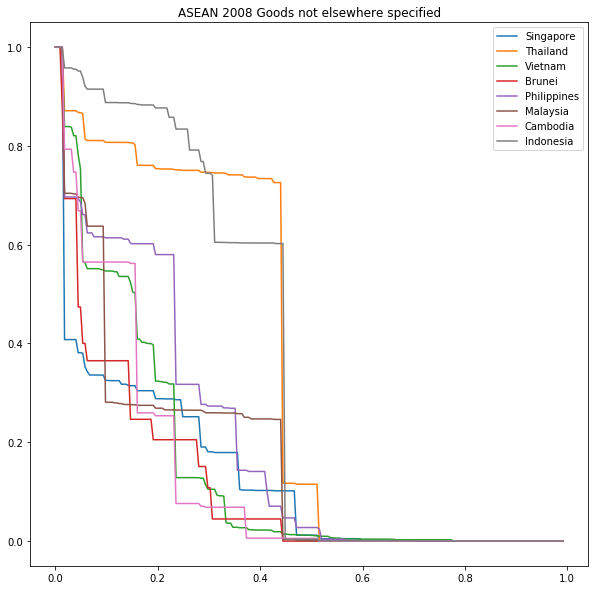

In [41]:
node_deletion(G_2008_7, asean_list, "ASEAN 2008 Goods not elsewhere specified")

## Calculate Degree Centrality

In [42]:
def get_deg_centrality(g, asean_list):
    return dict((k, nx.degree_centrality(g)[k]) for k in asean_list if k in nx.degree_centrality(g))

In [43]:
get_deg_centrality(G_2008_1,asean_list)

{'Singapore': 1.097872340425532,
 'Thailand': 1.2936170212765958,
 'Vietnam': 1.0638297872340425,
 'Brunei': 0.30638297872340425,
 'Philippines': 0.9531914893617022,
 'Malaysia': 1.3148936170212766,
 'Cambodia': 0.2893617021276596,
 'Indonesia': 1.1148936170212767}

In [44]:
get_deg_centrality(G_2008_2,asean_list)

{'Singapore': 1.174468085106383,
 'Thailand': 1.4553191489361703,
 'Vietnam': 1.1659574468085108,
 'Brunei': 0.46808510638297873,
 'Philippines': 1.0893617021276596,
 'Malaysia': 1.425531914893617,
 'Cambodia': 0.48085106382978726,
 'Indonesia': 1.4340425531914893}

In [45]:
get_deg_centrality(G_2008_3,asean_list)

{'Singapore': 0.5782608695652174,
 'Thailand': 0.5652173913043478,
 'Vietnam': 0.26521739130434785,
 'Brunei': 0.11739130434782609,
 'Philippines': 0.2608695652173913,
 'Malaysia': 0.44782608695652176,
 'Cambodia': 0.0782608695652174,
 'Indonesia': 0.5304347826086957}

In [46]:
get_deg_centrality(G_2008_4,asean_list)

{'Singapore': 1.123404255319149,
 'Thailand': 1.3021276595744682,
 'Vietnam': 0.8808510638297873,
 'Brunei': 0.46382978723404256,
 'Philippines': 1.0297872340425531,
 'Malaysia': 1.2851063829787235,
 'Cambodia': 0.4085106382978724,
 'Indonesia': 1.1914893617021276}

In [47]:
get_deg_centrality(G_2008_5,asean_list)

{'Singapore': 1.0085106382978724,
 'Thailand': 1.2170212765957447,
 'Vietnam': 0.825531914893617,
 'Brunei': 0.3021276595744681,
 'Philippines': 0.7574468085106383,
 'Malaysia': 1.025531914893617,
 'Cambodia': 0.4297872340425532,
 'Indonesia': 1.0127659574468084}

In [48]:
get_deg_centrality(G_2008_6,asean_list)

{'Singapore': 1.1063829787234043,
 'Thailand': 1.3446808510638297,
 'Vietnam': 1.025531914893617,
 'Brunei': 0.4595744680851064,
 'Philippines': 1.1106382978723404,
 'Malaysia': 1.374468085106383,
 'Cambodia': 0.8170212765957447,
 'Indonesia': 1.3404255319148937}

In [49]:
get_deg_centrality(G_2008_7,asean_list)

{'Singapore': 0.42857142857142855,
 'Thailand': 0.59375,
 'Vietnam': 0.4196428571428571,
 'Brunei': 0.125,
 'Philippines': 0.3794642857142857,
 'Malaysia': 0.375,
 'Cambodia': 0.10714285714285714,
 'Indonesia': 0.40178571428571425}

## Get Eigenvector Centrality

In [50]:
def get_eigenvector_centrality(g, asean_list):
    return dict((k, nx.eigenvector_centrality(g)[k]) for k in asean_list if k in nx.eigenvector_centrality(g))

In [51]:
get_eigenvector_centrality(G_2008_1,asean_list)

{'Singapore': 0.10110653220741424,
 'Thailand': 0.08882312101742684,
 'Vietnam': 0.09344766725357981,
 'Brunei': 0.04643917633614481,
 'Philippines': 0.07076036646484209,
 'Malaysia': 0.09502876317375383,
 'Cambodia': 0.04671671781127417,
 'Indonesia': 0.07674097754139923}

In [56]:
get_deg_centrality(G_2008_2,asean_list)

{'Singapore': 1.174468085106383,
 'Thailand': 1.4553191489361703,
 'Vietnam': 1.1659574468085108,
 'Brunei': 0.46808510638297873,
 'Philippines': 1.0893617021276596,
 'Malaysia': 1.425531914893617,
 'Cambodia': 0.48085106382978726,
 'Indonesia': 1.4340425531914893}

In [57]:
get_deg_centrality(G_2008_3,asean_list)

{'Singapore': 0.5782608695652174,
 'Thailand': 0.5652173913043478,
 'Vietnam': 0.26521739130434785,
 'Brunei': 0.11739130434782609,
 'Philippines': 0.2608695652173913,
 'Malaysia': 0.44782608695652176,
 'Cambodia': 0.0782608695652174,
 'Indonesia': 0.5304347826086957}

In [58]:
get_deg_centrality(G_2008_4,asean_list)

{'Singapore': 1.123404255319149,
 'Thailand': 1.3021276595744682,
 'Vietnam': 0.8808510638297873,
 'Brunei': 0.46382978723404256,
 'Philippines': 1.0297872340425531,
 'Malaysia': 1.2851063829787235,
 'Cambodia': 0.4085106382978724,
 'Indonesia': 1.1914893617021276}

In [59]:
get_deg_centrality(G_2008_5,asean_list)

{'Singapore': 1.0085106382978724,
 'Thailand': 1.2170212765957447,
 'Vietnam': 0.825531914893617,
 'Brunei': 0.3021276595744681,
 'Philippines': 0.7574468085106383,
 'Malaysia': 1.025531914893617,
 'Cambodia': 0.4297872340425532,
 'Indonesia': 1.0127659574468084}

In [60]:
get_deg_centrality(G_2008_6,asean_list)

{'Singapore': 1.1063829787234043,
 'Thailand': 1.3446808510638297,
 'Vietnam': 1.025531914893617,
 'Brunei': 0.4595744680851064,
 'Philippines': 1.1106382978723404,
 'Malaysia': 1.374468085106383,
 'Cambodia': 0.8170212765957447,
 'Indonesia': 1.3404255319148937}

## Targeted Node Removal

In [61]:
# def get_highest_node(graph):
#     highest_value = -1
#     max_node = -1

#     for i in graph.degree():
#         if i[1] > highest_value:
#             highest_value = i[1]
#             max_node = i[0]
            
#     return max_node

def get_highest_node(graph, target_node):
    copy = graph.copy()
    copy.remove_node(target_node)
    highest_value = -1
    max_node = -1
    
    if len(list(graph)) == 0:
            max_node = target_node
    else:
        for i in copy.degree():
            if i[1] < highest_value:
                continue
            else:
                highest_value = i[1]
                max_node = i[0]
    return max_node

def targeted_node_deletion(gr, arr):
#     frame_holder = []
    fig = plt.figure(figsize=(10,10))

    for j in arr:
        list_of_countries = list(gr).copy()
        #remove target node from list
        list_of_countries.remove(j)

        temp = gr.copy()

        node_count = nx.number_of_nodes(gr)
        countries_removed = 0
        fraction = []
        trade_series = []
        DF = pd.DataFrame()
        

        #take out one country, and do node deletion on the rest
        for i in list_of_countries:
            #get series of import-export
            trade_series.append((calculate_export(temp))[j])
            fraction.append(countries_removed/node_count)
            temp_list = list(temp)

            node_to = get_highest_node(temp, j)
            temp_list.remove(node_to)
            temp.remove_node(node_to)
            countries_removed += 1

        DF["Fraction"] = fraction
        DF["Export"] = trade_series
        DF["Export"] = DF.iloc[:,1:] / DF.iloc[0,1:]
#         frame_holder.append(DF)
        plt.plot(DF['Fraction'], DF['Export'], label=j)
    plt.legend(loc="upper right")
    plt.xlim((0,0.1))
    plt.show()

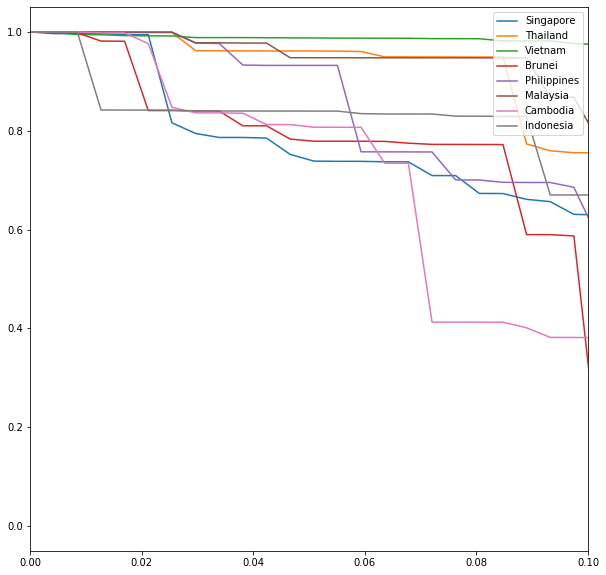

In [66]:
targeted_node_deletion(G_2008, asean_list)

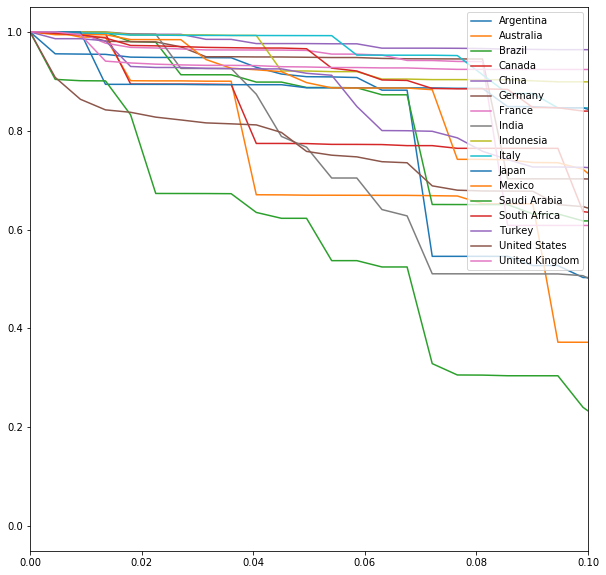

In [67]:
targeted_node_deletion(G_1997, g20_list)

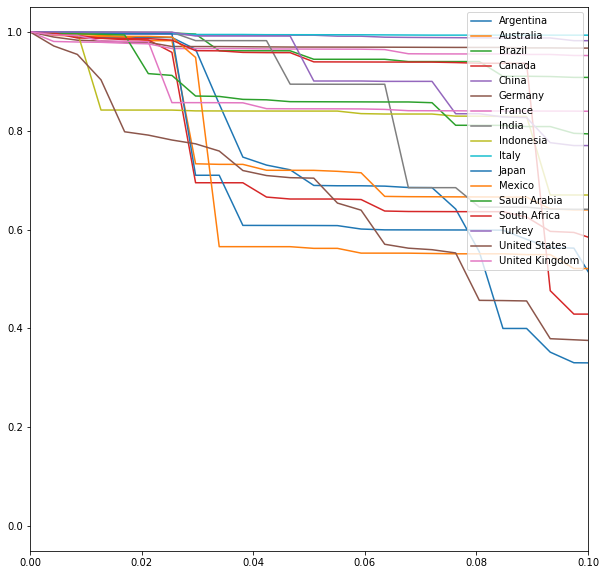

In [68]:
targeted_node_deletion(G_2008, g20_list)

## Calculate Network Assortativity

In [69]:
def get_assortativity(g, asean_list):
    return dict((k, nx.degree_assortativity_coefficient(g)[k]) for k in asean_list if k in nx.eigenvector_centrality(g))

In [71]:
nx.degree_assortativity_coefficient(G_2008)

-0.3649010278772336

## Testing Effect of Modularity with Node Deletion

In [ ]:
# read data for 1990, 1991, 2010
trade_focus = pd.read_csv('DataJobID-1782282_1782282_worldtrade.csv', encoding = "ISO-8859-1")
trade_1990 = trade_focus[trade_focus["Year"] == 1990]
trade_1991 = trade_focus[trade_focus["Year"] == 1991]
trade_2010 = trade_focus[trade_focus["Year"] == 2010]

In [ ]:
trade_1990.rename(columns={"TradeValue in 1000 USD": "weight"}, inplace=True)
trade_1991.rename(columns={"TradeValue in 1000 USD": "weight"}, inplace=True)
trade_2010.rename(columns={"TradeValue in 1000 USD": "weight"}, inplace=True)

In [ ]:
G_1990 = nx.from_pandas_edgelist(trade_1990, 'ReporterName', 'PartnerName', ['weight'], 
                                 create_using=nx.DiGraph())
G_1991 = nx.from_pandas_edgelist(trade_1991, 'ReporterName', 'PartnerName', ['weight'], 
                                 create_using=nx.DiGraph())
G_2010 = nx.from_pandas_edgelist(trade_2010, 'ReporterName', 'PartnerName', ['weight'], 
                                 create_using=nx.DiGraph())

In [ ]:
targeted_node_deletion(G_1990, asean_list)

In [ ]:
targeted_node_deletion(G_2010, asean_list)

In [ ]:
targeted_node_deletion(G_1991, saarc_list)

In [ ]:
targeted_node_deletion(G_2010, saarc_list)